In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

import os
dataroot = 'archive/cartoon/'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os 
import tensorflow as tf 

In [3]:
img_array = cv2.imread('archive/cartoon/Train/angry/Aishwarya_Rai67.png')


In [4]:
img_array.shape

(182, 182, 3)

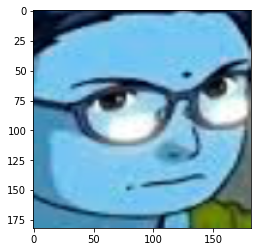

In [5]:
plt.imshow(img_array)#BGR

In [6]:
Datadirectory = "archive/cartoon/Train/"
Classes = ["angry","happy","neutral","sad"]


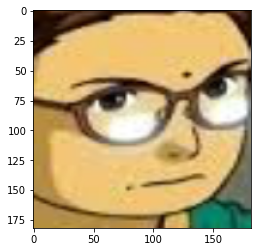

In [7]:
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

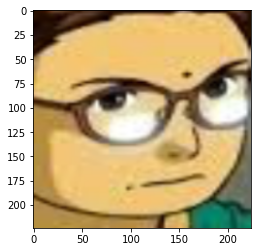

In [8]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data = []#data array

def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory,category)
    class_num = Classes.index(category) # 0 1 label
    for img in os.listdir(path):
      try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array,(img_size,img_size))
          training_Data.append([new_array,class_num])
      except Exception as e:
        pass



In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

1810


In [13]:
import random 
random.shuffle(training_Data)

In [14]:
X=[]
y=[]

for features,label in training_Data:
  X.append(features)
  y.append(label)

X= np.array(X).reshape(-1,img_size,img_size,3)# converting it to 4 dimensions

In [15]:
X.shape

(1810, 224, 224, 3)

In [16]:

X= X/255.0 #normalization


In [17]:
Y = np.array(y)
Y.shape

(1810,)

In [18]:
import tensorflow as tf 
from tensorflow import keras
from keras import layers
import platform
from keras.applications import MobileNetV2

import pathlib

In [19]:
model = MobileNetV2()
model.summary()

14536120/14536120 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

 ization)                                                                                         
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malizatio

                                                                                                  
 block_6_project_BN (BatchNorma  (None, 14, 14, 64)  256         ['block_6_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
          

 block_10_depthwise_BN (BatchNo  (None, 14, 14, 384)  1536       ['block_10_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_

 block_14_expand_relu (ReLU)    (None, 7, 7, 960)    0           ['block_14_expand_BN[0][0]']     
                                                                                                  
 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_

# New Section

In [20]:
#Transfer Learning and weights tuning 

base_input = model.layers[0].input


In [21]:
base_output = model.layers[-2].output

In [22]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(4,activation='softmax')(final_output)


In [24]:
final_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:

new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [28]:
new_model.fit(X,Y,batch_size=10,verbose=2,epochs=25)


Epoch 1/25
181/181 - 211s - loss: 0.9907 - accuracy: 0.5735 - 211s/epoch - 1s/step
Epoch 2/25
181/181 - 191s - loss: 0.7238 - accuracy: 0.7033 - 191s/epoch - 1s/step
Epoch 3/25
181/181 - 192s - loss: 0.6103 - accuracy: 0.7558 - 192s/epoch - 1s/step
Epoch 4/25
181/181 - 195s - loss: 0.4887 - accuracy: 0.8215 - 195s/epoch - 1s/step
Epoch 5/25
181/181 - 194s - loss: 0.4476 - accuracy: 0.8282 - 194s/epoch - 1s/step
Epoch 6/25
181/181 - 186s - loss: 0.3587 - accuracy: 0.8696 - 186s/epoch - 1s/step
Epoch 7/25
181/181 - 188s - loss: 0.3965 - accuracy: 0.8453 - 188s/epoch - 1s/step
Epoch 8/25
181/181 - 189s - loss: 0.3452 - accuracy: 0.8773 - 189s/epoch - 1s/step
Epoch 9/25
181/181 - 189s - loss: 0.2895 - accuracy: 0.9000 - 189s/epoch - 1s/step
Epoch 10/25
181/181 - 188s - loss: 0.2271 - accuracy: 0.9204 - 188s/epoch - 1s/step
Epoch 11/25
181/181 - 187s - loss: 0.2535 - accuracy: 0.9055 - 187s/epoch - 1s/step
Epoch 12/25
181/181 - 188s - loss: 0.2775 - accuracy: 0.9017 - 188s/epoch - 1s/step
E

In [29]:
new_model.save('my_model.h5')

In [30]:
from keras.models import load_model
new_model = load_model('my_model.h5')


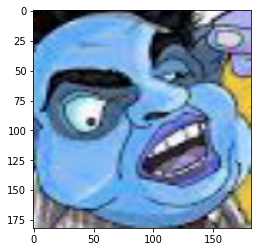

In [31]:
frame = cv2.imread("archive/cartoon/Test/angry/Lata_Mangeshkar48.png")
frame.shape
plt.imshow(frame)

In [32]:
frame_image = cv2.resize(frame,(224,224))
frame_image = np.expand_dims(frame_image,axis =0)
frame_image= frame_image/255.0

In [33]:
predictions = new_model.predict(frame_image) 


1/1 [==============================] - 1s 1s/step


In [34]:
np.argmax(predictions)

1

In [37]:
Classes = ["angry", "happy", "neutral", "sad"]
Datadirectory = "archive/cartoon/Test/"

img_size = 224

testing_data = []

def create_testing_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass


In [38]:
create_testing_data()

#testing_data = np.array(testing_data)


In [39]:
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
X_test = X_test / 255.0
y_test = np.array(y_test)
print(y_test.size)
print(X_test.shape)

369
(369, 224, 224, 3)


In [40]:
y_pred = new_model.predict(X_test)


12/12 [==============================] - 7s 539ms/step


In [41]:
y_pred.shape

(369, 4)

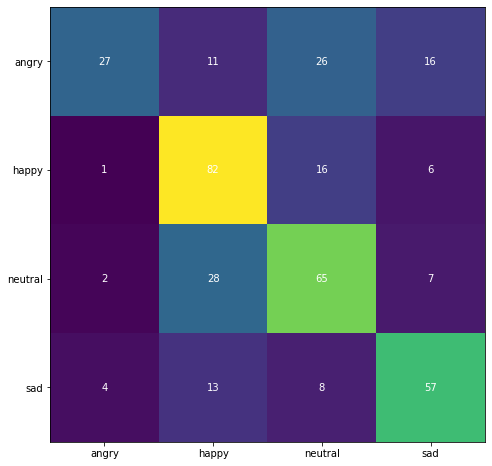

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('angry', 'happy', 'neutral', 'sad'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('angry', 'happy', 'neutral', 'sad'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [43]:
loss, accuracy = new_model.evaluate(X_test, y_test, verbose=2)

print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.4f}'.format(accuracy))

12/12 - 8s - loss: 1.8493 - accuracy: 0.6260 - 8s/epoch - 635ms/step
Loss: 1.8493
Accuracy: 0.6260


In [44]:
y_test.size
y_pred.size


1476

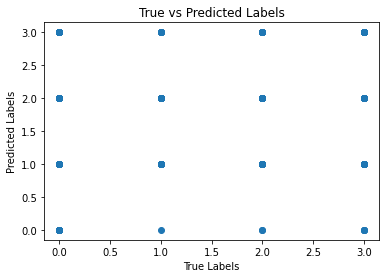

In [45]:
import matplotlib.pyplot as plt

# y_test = np.random.randint(0, 4, size=738)
# y_pred = np.random.randint(0, 4, size=(738,10))


plt.scatter(y_test,y_pred.argmax(axis=1))
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

In [46]:
from sklearn.metrics import classification_report

class_names = ['angry', 'happy', 'neutral', 'sad']

y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

       angry       0.79      0.34      0.47        80
       happy       0.61      0.78      0.69       105
     neutral       0.57      0.64      0.60       102
         sad       0.66      0.70      0.68        82

    accuracy                           0.63       369
   macro avg       0.66      0.61      0.61       369
weighted avg       0.65      0.63      0.61       369



In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = new_model.predict(X_test)




12/12 [==============================] - 6s 479ms/step


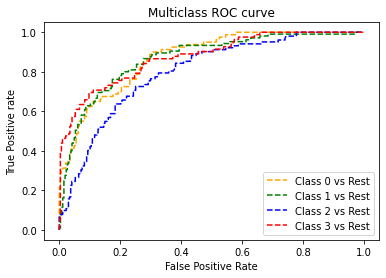

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# y_test is the true labels and y_pred_prob is the predicted probabilities
# y_test and y_pred_prob should both have shape (n_samples, n_classes)

n_class = 4
# Compute the ROC curve and ROC area for each class
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [49]:
from sklearn.metrics import roc_auc_score
import numpy as np

auc_roc = []

for i in range(n_class):
  y_true_i = np.array([1 if y==i else 0 for y in y_test])
  y_pred_i = y_pred_prob[:,i]
  auc_i = roc_auc_score(y_true_i,y_pred_i)
  auc_roc.append(auc_i)

mean_auc_roc = np.mean(auc_roc)
mean_auc_roc

0.8533261002521915

# Analysing Datasets generated via DCGAN architecture

In [64]:
new_model =  load_model('my_model.h5')


In [65]:
Classes = ["angry", "happy", "neutral", "sad"]
Datadirectory = "GansImages/"

img_size = 224

testing_data = []

def create_testing_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

In [66]:
create_testing_data()

#testing_data = np.array(testing_data)


In [67]:
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
X_test = X_test / 255.0
y_test = np.array(y_test)
print(y_test.size)
print(X_test.shape)

17
(17, 224, 224, 3)


In [68]:
y_pred = new_model.predict(X_test)


1/1 [==============================] - 1s 1s/step


In [69]:
y_pred.shape

(17, 4)

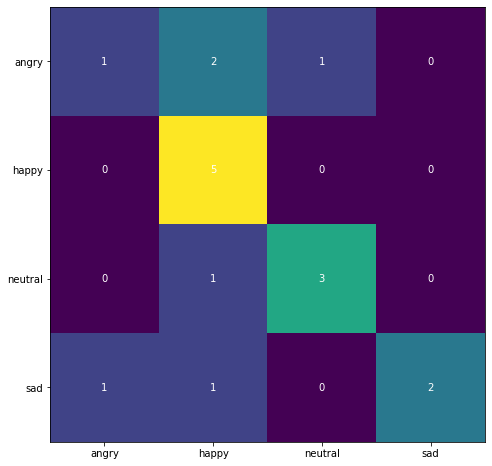

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('angry', 'happy', 'neutral', 'sad'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('angry', 'happy', 'neutral', 'sad'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [71]:
loss, accuracy = new_model.evaluate(X_test, y_test, verbose=2)

print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.4f}'.format(accuracy))

1/1 - 2s - loss: 2.4059 - accuracy: 0.6471 - 2s/epoch - 2s/step
Loss: 2.4059
Accuracy: 0.6471


In [72]:
y_test.size
y_pred.size


68

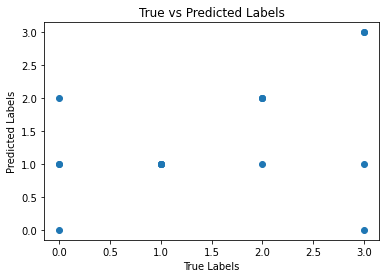

In [73]:
import matplotlib.pyplot as plt

# y_test = np.random.randint(0, 4, size=738)
# y_pred = np.random.randint(0, 4, size=(738,10))


plt.scatter(y_test,y_pred.argmax(axis=1))
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

In [74]:
from sklearn.metrics import classification_report

class_names = ['angry', 'happy', 'neutral', 'sad']

y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

       angry       0.50      0.25      0.33         4
       happy       0.56      1.00      0.71         5
     neutral       0.75      0.75      0.75         4
         sad       1.00      0.50      0.67         4

    accuracy                           0.65        17
   macro avg       0.70      0.62      0.62        17
weighted avg       0.69      0.65      0.62        17



In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = new_model.predict(X_test)




1/1 [==============================] - 0s 332ms/step


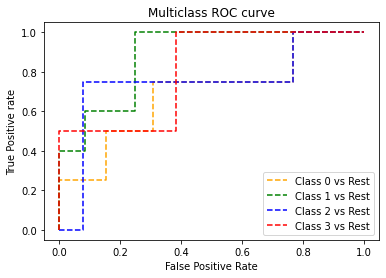

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# y_test is the true labels and y_pred_prob is the predicted probabilities
# y_test and y_pred_prob should both have shape (n_samples, n_classes)

n_class = 4
# Compute the ROC curve and ROC area for each class
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [77]:
from sklearn.metrics import roc_auc_score
import numpy as np

auc_roc = []

for i in range(n_class):
  y_true_i = np.array([1 if y==i else 0 for y in y_test])
  y_pred_i = y_pred_prob[:,i]
  auc_i = roc_auc_score(y_true_i,y_pred_i)
  auc_roc.append(auc_i)

mean_auc_roc = np.mean(auc_roc)
mean_auc_roc

0.7833333333333332

# Merged Dataset with Synthetic Generator and Dataset Images

In [78]:
new_model =  load_model('my_model.h5')


In [79]:
Classes = ["angry", "happy", "neutral", "sad"]
Datadirectory = "archive/cartoon/Test/"

img_size = 224

testing_data = []

def create_testing_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

In [80]:
create_testing_data()

#testing_data = np.array(testing_data)


In [81]:
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
X_test = X_test / 255.0
y_test = np.array(y_test)
print(y_test.size)
print(X_test.shape)

386
(386, 224, 224, 3)


In [82]:
y_pred = new_model.predict(X_test)


13/13 [==============================] - 8s 521ms/step


In [83]:
y_pred.shape

(386, 4)

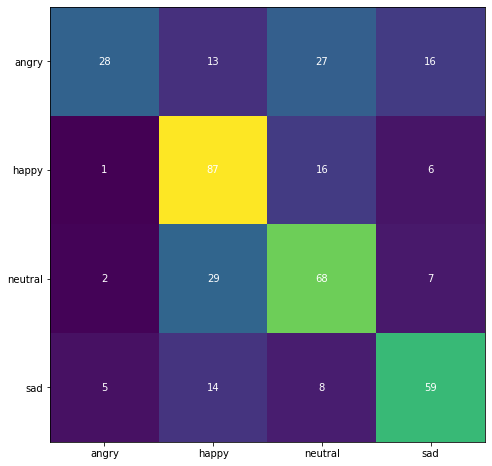

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('angry', 'happy', 'neutral', 'sad'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('angry', 'happy', 'neutral', 'sad'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [85]:
loss, accuracy = new_model.evaluate(X_test, y_test, verbose=2)

print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.4f}'.format(accuracy))

13/13 - 8s - loss: 1.8738 - accuracy: 0.6269 - 8s/epoch - 626ms/step
Loss: 1.8738
Accuracy: 0.6269


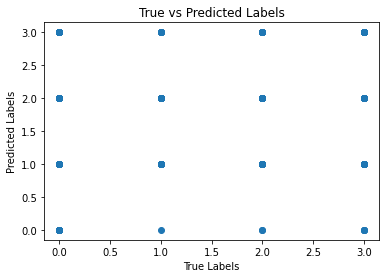

In [57]:
import matplotlib.pyplot as plt

# y_test = np.random.randint(0, 4, size=738)
# y_pred = np.random.randint(0, 4, size=(738,10))


plt.scatter(y_test,y_pred.argmax(axis=1))
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

In [86]:
from sklearn.metrics import classification_report

class_names = ['angry', 'happy', 'neutral', 'sad']

y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

       angry       0.78      0.33      0.47        84
       happy       0.61      0.79      0.69       110
     neutral       0.57      0.64      0.60       106
         sad       0.67      0.69      0.68        86

    accuracy                           0.63       386
   macro avg       0.66      0.61      0.61       386
weighted avg       0.65      0.63      0.61       386



In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = new_model.predict(X_test)




13/13 [==============================] - 7s 533ms/step


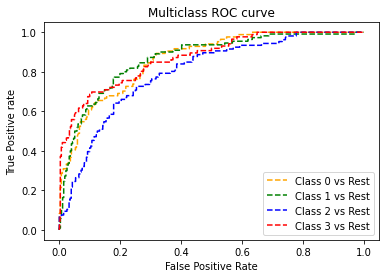

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# y_test is the true labels and y_pred_prob is the predicted probabilities
# y_test and y_pred_prob should both have shape (n_samples, n_classes)

n_class = 4
# Compute the ROC curve and ROC area for each class
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [89]:
from sklearn.metrics import roc_auc_score
import numpy as np

auc_roc = []

for i in range(n_class):
  y_true_i = np.array([1 if y==i else 0 for y in y_test])
  y_pred_i = y_pred_prob[:,i]
  auc_i = roc_auc_score(y_true_i,y_pred_i)
  auc_roc.append(auc_i)

mean_auc_roc = np.mean(auc_roc)
mean_auc_roc

0.8491823260084809